In [ ]:
# Allow imports from parent directory 
import os, sys
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
    sys.path.append(os.path.abspath(".")) 

from src import hyperparam_analysis, flops_in_folder

### Overall Flops in this Notebook:

In [2]:
_, _, _ = flops_in_folder('results/Hyperparam')

Number of unique result files: 11
Total Training FLOPs: 3.881e+16
Total Evaluation FLOPs: 5.559e+15
Total Combined FLOPs: 4.437e+16
Percentage of Total FLOPs Budget:   44.367 %


# Hyperparameter Tuning (Non Grid Search for Efficiency and Compute Reasons)
---
- In the previous notebook, we showed the model was able to learn and generalise well over the data

---

- I now aim to preform hyperparameter tuning by analysing the models preformance over an suggested range
- If compute (FLOPS) was not a limiting factor this could be investigated over a whole grid search.
- However inorder to reduce unnecesarry tests this is preformed in 1 Dimensional Axis rather than a 2D/ £D grid search

---
- During the initial hyperparameter tuning before exploring token length, I use a **default token length of 256** as this will half my compute during hyperparameter testing and allow me to trial for longer periods and more hyperparameter test 

### The default setting of tuning:

| Parameter                           | Value  |
| :------------------------------- | :-- |
| No of validation batches evaluated at every step | 25  |
| Evaluation Frequency             | 25  |
| Max Training Steps               | 800 |
| Batch size                       | 4   |
| Early Stopping Patience          | High to stop comparable scores unless definite |

## **Intresting Conclusion From This Notebook (Investigation 2)**
- We see that the Lora rank from 2,4,8 has very marginal differences on the training success, this promted the question of whether the Lora Rank were themselves improving performance or whether it was the mainly uses the LM Bias to tune the vocabuluarly
- This would make sense, as we technically have a vocabuluarly of 12 tokens (all numbers, commas and semicolons) and in training you could set very negetive biases for the rest of them (151,936) and it could drastically improve results
- So I decided to run it with no lora at all ie Lora Rank of 0 to see if we gain similair results, but it is much worse, providing evidence that Lora is largely responsible for the preformance. 

# **Investigation 1:** 
## Initial Investigation Into Decimal Places

- I use my initial use of compute to preform a very short investigation into the number of significant figures than I should use when training the model.
It
## **Several thoughts on this matter:**
### Higher Decimal Places vs Lower Decimal Places
- A higher degree of precision would all the model to potential train to a higher degree of accuracy and thus over a longer period be able to learn the global distribution to a greater extent.
- It would increase the number of tokens used per data point and thus reduce trajectory length in each batch of data shown to the model.
- In cross entropy loss as we are comparing logits individuals catagorical loss, then model cannot distinguish between the error at the 3rd degree of precision to the fourth thus the following error (at a very basic level) would potentially lead to the same loss. 
- Overall you would **expect the loss to be higher** as it is penalising smaller margins that a lower precision wouldnt even notice.
- Thus comparing the loss of models is not necessarily fair.

### Very higher level example

| Data  | Result | Effect                                                                                                 |
| :---- | :----- | :----------------------------------------------------------------------------------------------------- |
| Truth | 3.44   | N/A                                                                                                    |
| Gen1  | 3.54   | Wrong on 1/4 of tokens                                                                                 |
| Gen2  | 3.45   | Wrong on 1/4 of tokens (potentially same error despite being a smaller error) |


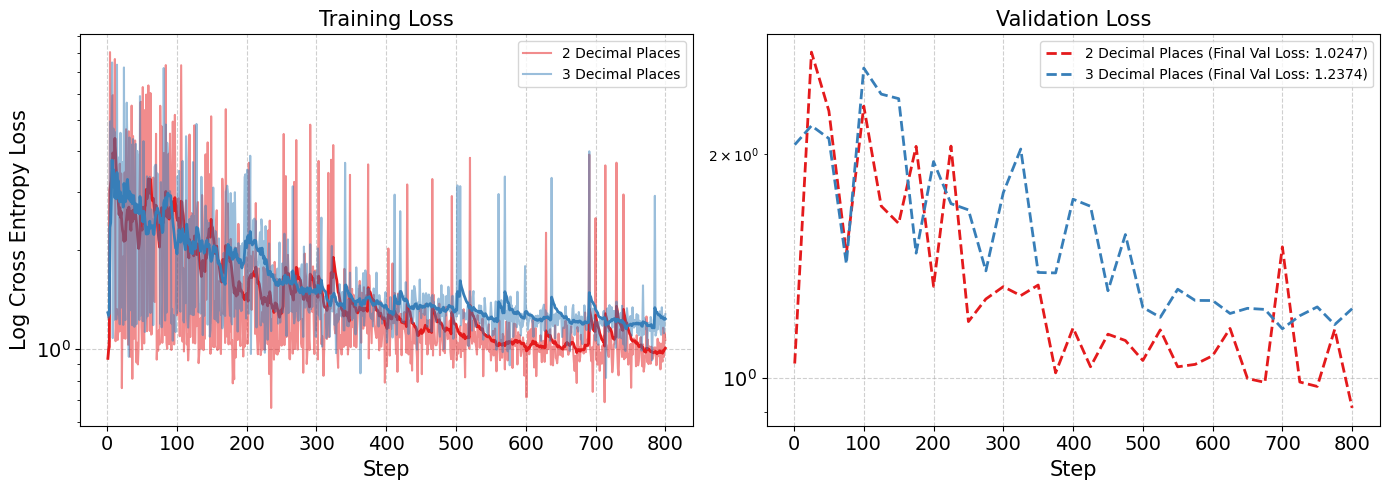

,Label,Train FLOPs,Eval FLOPs,Total FLOPs,Final Val Loss
0,2 Decimal Places,2.841555e+15,4.345211e+14,3.276076e+15,1.024661
1,3 Decimal Places,2.841555e+15,4.691526e+14,3.310707e+15,1.237398


In [3]:
# Import the data from the results/Hyperparam/Hyperparam/Hyperparam_Decimal
Hyperparam_Decimal_2_Path = 'results/Hyperparam/Hyperparam_Decimal/DP2Learn1e-05Lora4Token256.json'
Hyperparm_Decimal_3_Path = 'results/Hyperparam/Hyperparam_Decimal/DP3Learn1e-05Lora4Token256.json'
Path_list_Dec = [Hyperparam_Decimal_2_Path, Hyperparm_Decimal_3_Path]
Name_list_Dec = ['2 Decimal Places', '3 Decimal Places']
hyperparam_analysis(Path_list_Dec, Name_list_Dec, log_scale=True)

# **Investigation 2:**
## Learning Rate (constant lora rank = 4, Decimal Place = 2)

- In this investigation we initially ran runs on the 3 suggested hyperparameters suggested however it was found that $1\times 10^{-4}$ was the clear winner.
- It was determined that with a high confidence we could remove any future tests with learnign rates of $1\times 10^{-5}$ and $5\times 10^{-5}$.
- As this was at the boundary of our search area, it is good practise to try and find the minimium within a given dimension so the search area was further exopanded to included $1\times 10^{-3}$
- This led to the same problem, but due to the flops constraint of the coursework we had to accept this and move on.
- In true practice you would continue to work along this axis until you can identify a minimum point

## **RESULTS**:
- Clear and consistent performance benefit with a learning rate of: $1\times 10^{-3}$
- This shows rapid learning at the start in comparision to the others, but also then shows rather flat/ lack of learning beyond 500 steps. 
- Suggests:
    - Need for early stopping when training full run
    - Potentially a learning rate scheduler


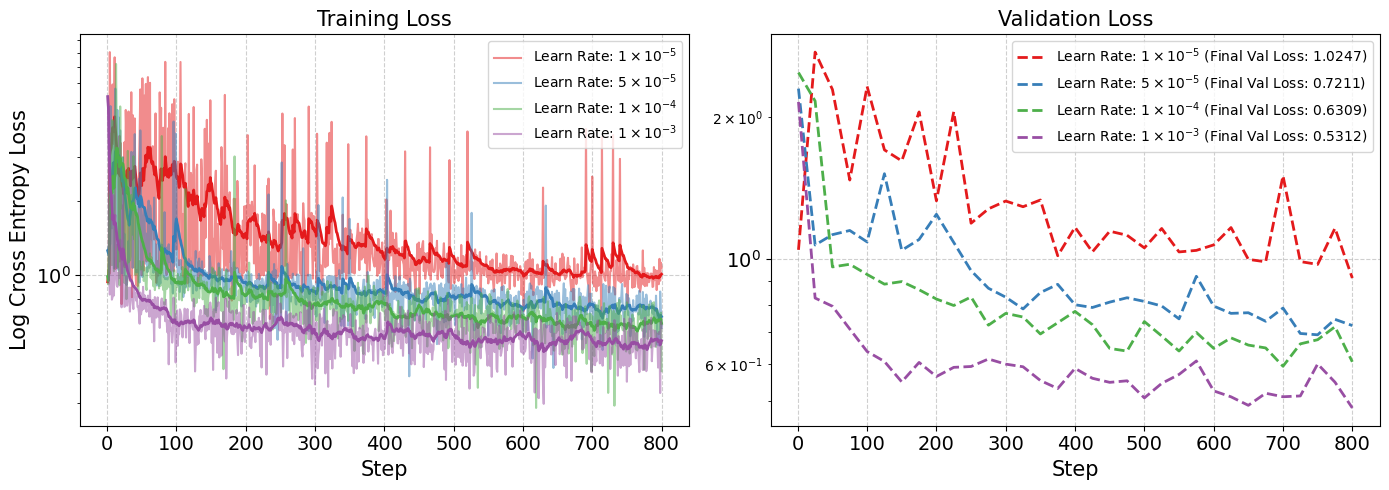

,Label,Train FLOPs,Eval FLOPs,Total FLOPs,Final Val Loss
0,Learn Rate: $1 \times 10^{-5}$,2.841555e+15,4.345211e+14,3.276076e+15,1.024661
1,Learn Rate: $5 \times 10^{-5}$,2.841555e+15,4.345211e+14,3.276076e+15,0.721130
2,Learn Rate: $1 \times 10^{-4}$,2.841555e+15,4.345211e+14,3.276076e+15,0.630856
3,Learn Rate: $1 \times 10^{-3}$,2.841555e+15,4.345211e+14,3.276076e+15,0.531184


In [4]:
# Import the data from the results/Hyperparam/Hyperparam/Hyperparam_Decimal
Hyperparam_LR_1_Path = 'results/Hyperparam/Hyperparam_LR/DP2Learn1e-05Lora4Token256.json'
Hyperparam_LR_2_Path = 'results/Hyperparam/Hyperparam_LR/DP2Learn5e-05Lora4Token256.json'
Hyperparam_LR_3_Path = 'results/Hyperparam/Hyperparam_LR/DP2Learn0.0001Lora4Token256.json'
Hyperparam_LR_4_Path = 'results/Hyperparam/Hyperparam_LR/DP2Learn0.001Lora4Token256.json'
Path_list_LR = [Hyperparam_LR_1_Path, Hyperparam_LR_2_Path, Hyperparam_LR_3_Path, Hyperparam_LR_4_Path]
Name_list_LR = [r'Learn Rate: $1 \times 10^{-5}$', r'Learn Rate: $5 \times 10^{-5}$', r'Learn Rate: $1 \times 10^{-4}$', r'Learn Rate: $1 \times 10^{-3}$']
hyperparam_analysis(Path_list_LR, Name_list_LR, log_scale=True)

# **Investigation 3:**
## Lora Rate (constant Learning Rate = 0.001, Decimal Place = 2)

## **RESULTS**:
- This dimension of the parameters search area shows very little variation in performance suggesting the lora rank may not the effect results as much as expected and even poses the question is it this LoRA that in effectively training or the LM Bias Head ?
- I investigate this further (as by not using a gird search I now have more flops availability), we try with a lora rank of 0 and it is shows widly worse results - supporting LoRA's contribution to the training. Despite its rank not massively helping
- Overall (by a marignal amount) we find that a Lora Rank of 8 is the best result
    - Although by a very small amount, the additional FLOPS with Lora 8 vs 2 or 4 is relatively very very small and thus this improvment is still justified

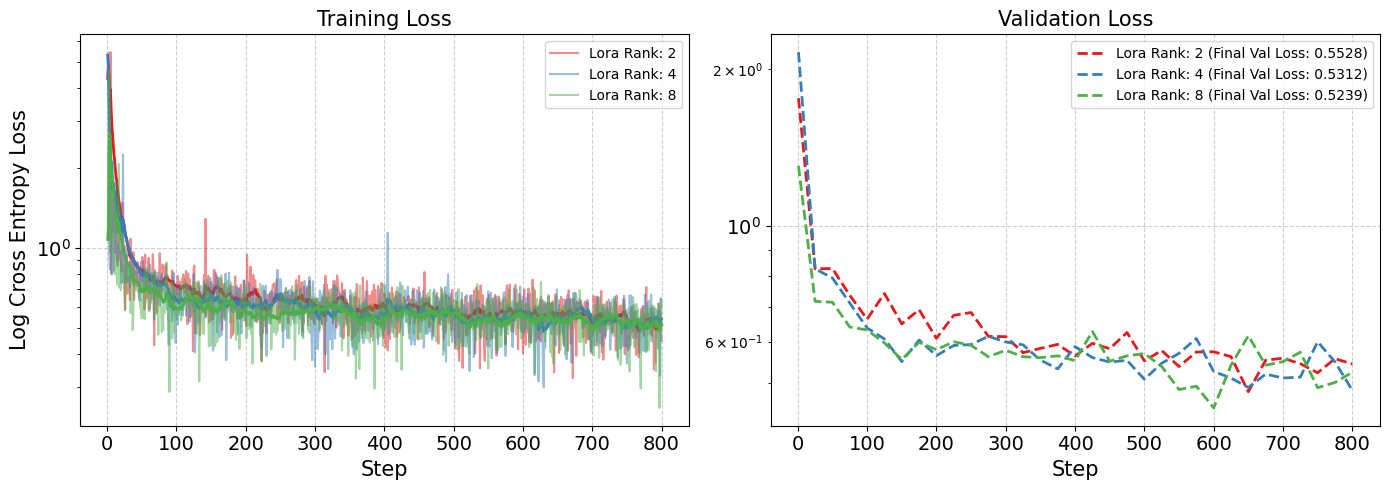

,Label,Train FLOPs,Eval FLOPs,Total FLOPs,Final Val Loss
0,Lora Rank: 2,2.840710e+15,4.343918e+14,3.275101e+15,0.552826
1,Lora Rank: 4,2.841555e+15,4.345211e+14,3.276076e+15,0.531184
2,Lora Rank: 8,2.843246e+15,4.347796e+14,3.278025e+15,0.523926


In [5]:
# Import the data from the results/Hyperparam_Decimal
Hyperparam_Lora2_Path = 'results/Hyperparam/Hyperparam_Lora/DP2Learn0.001Lora2Token256.json'
Hyperparam_Lora4_Path = 'results/Hyperparam/Hyperparam_Lora/DP2Learn0.001Lora4Token256.json'
Hyperparam_Lora8_Path = 'results/Hyperparam/Hyperparam_Lora/DP2Learn0.001Lora8Token256.json'

Path_list_Lora = [Hyperparam_Lora2_Path, Hyperparam_Lora4_Path, Hyperparam_Lora8_Path]
Name_list_Lora = [r'Lora Rank: 2', r'Lora Rank: 4', r'Lora Rank: 8']
hyperparam_analysis(Path_list_Lora, Name_list_Lora, log_scale=True)

## Testing Lora is actually responsible

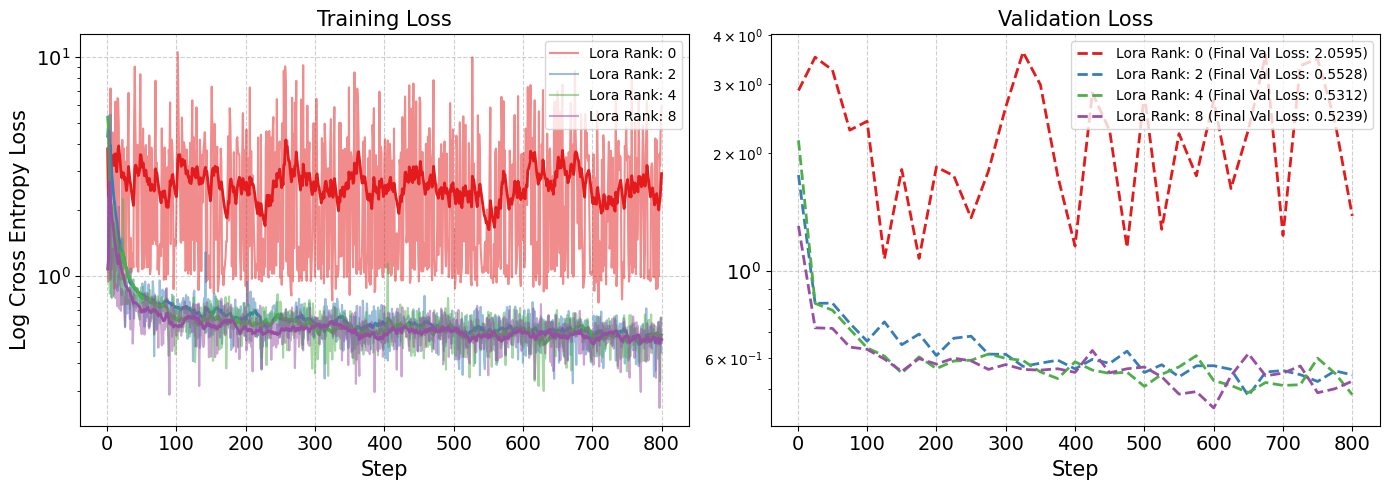

,Label,Train FLOPs,Eval FLOPs,Total FLOPs,Final Val Loss
0,Lora Rank: 0,2.839759e+15,4.342464e+14,3.274005e+15,2.059464
1,Lora Rank: 2,2.840710e+15,4.343918e+14,3.275101e+15,0.552826
2,Lora Rank: 4,2.841555e+15,4.345211e+14,3.276076e+15,0.531184
3,Lora Rank: 8,2.843246e+15,4.347796e+14,3.278025e+15,0.523926


In [6]:
# Import the data from the results/Hyperparam_Decimal
Hyperparam_Lora0_Path = 'results/Hyperparam/Hyperparam_Lora/DP2Learn0.001Lora0Token256.json'
Hyperparam_Lora2_Path = 'results/Hyperparam/Hyperparam_Lora/DP2Learn0.001Lora2Token256.json'
Hyperparam_Lora4_Path = 'results/Hyperparam/Hyperparam_Lora/DP2Learn0.001Lora4Token256.json'
Hyperparam_Lora8_Path = 'results/Hyperparam/Hyperparam_Lora/DP2Learn0.001Lora8Token256.json'

Path_list_Lora = [Hyperparam_Lora0_Path, Hyperparam_Lora2_Path, Hyperparam_Lora4_Path, Hyperparam_Lora8_Path]
Name_list_Lora = [r'Lora Rank: 0', r'Lora Rank: 2', r'Lora Rank: 4', r'Lora Rank: 8']
hyperparam_analysis(Path_list_Lora, Name_list_Lora, log_scale=True)

# **Investigation 4:**
## Token (Context) Length (constant: Lora Rank = 8, Learning Rate = 0.001, Decimal Place = 2)
### Cant neccarily compare at a fixed training step as shown different amount of data and use different no. flops

## **RESULTS**:
- We can see that a context length of 768 shows consistently better results
- You first must question whether this is the result of it simply being trained on more data overall as it is shown effectly more data points per run and each run uses more FLOPS
- thus it is **not necessarily fair to compare it at a fixed number of steps**
- In this context you can see that at context length 768 it shows much faster training even if you compare the preformance at relative training steps ie step number 800 for context length 128 with step number 533 for context length 512 with step number 133 for context length of 768 
- 768 is still a clear winner when comparing across a weighted number of steps

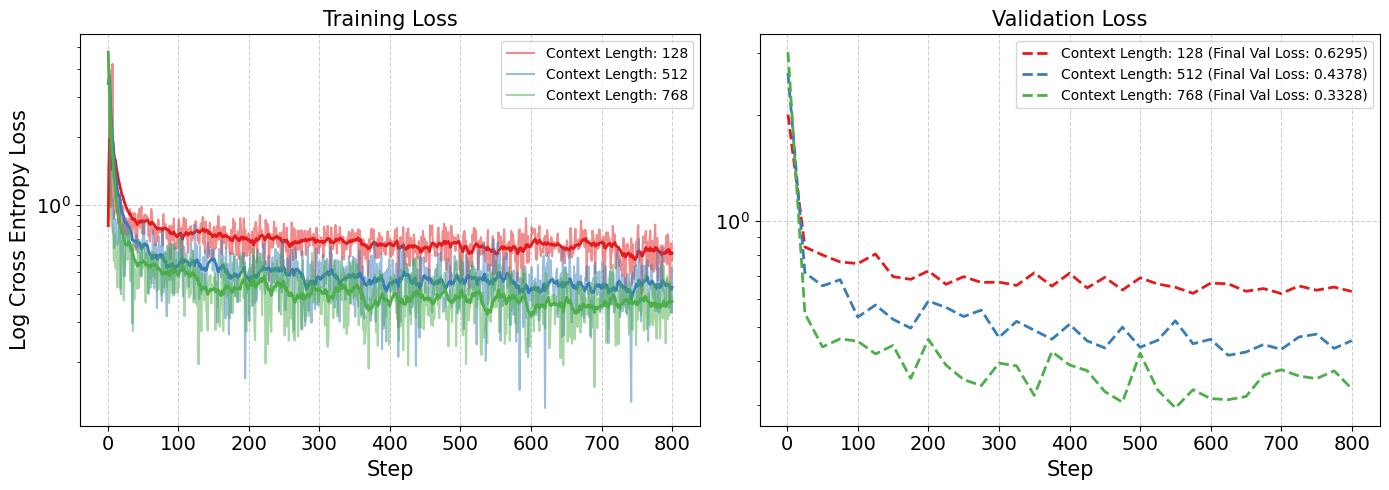

,Label,Train FLOPs,Eval FLOPs,Total FLOPs,Final Val Loss
0,Context Length: 128,1.407459e+15,3.031902e+14,1.710650e+15,0.629477
1,Context Length: 512,5.799798e+15,7.056421e+14,6.505440e+15,0.437777
2,Context Length: 768,8.869656e+15,1.039413e+15,9.909069e+15,0.332814


In [7]:
# Import the data from the results/Hyperparam_Decimal
Hyperparam_Context1_Path = 'results/Hyperparam/Hyperparam_Token/DP2Learn0.001Lora8Token128.json'
Hyperparam_Context2_Path = 'results/Hyperparam/Hyperparam_Token/DP2Learn0.001Lora8Token512.json'
Hyperparam_Context3_Path = 'results/Hyperparam/Hyperparam_Token/DP2Learn0.001Lora8Token768.json'

Path_list_Context = [Hyperparam_Context1_Path, Hyperparam_Context2_Path, Hyperparam_Context3_Path]
Name_list_Context = ['Context Length: 128', 'Context Length: 512', 'Context Length: 768']
hyperparam_analysis(Path_list_Context, Name_list_Context, log_scale=True)